In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pylab as plt
%matplotlib inline


In [2]:
df = pd.read_csv('energydata_complete.csv',parse_dates=['date'], index_col='date')
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non

In [4]:
#Rename the columns
new_column_names =['Appliances_energy_use', 'Light_energy_use', 'Kitchen_temp',
                   'Kitchen_humidity','LivingRoom_temp','livingRoom_humidity','LaundryRoom_temp',
                   'LaundryRoom_humidity','OfficeRoom_temp','OfficeRoom_humidity','Bathroom_temp',
                   'Bathroom_humidity', 'OutsideNorth_temp','OutsideNorth_humidity','IroningRoom_temp',
                   'IroningRoom_humidity','TeenagerRoom_temp','TeenagerRoom_humidity','ParentsRoom_temp',
                   'ParentsRoom_humidity','Outside_temp','Outside_pressure','Outside_humidity','WindSpeed',
                   'Visibility','Dewpoint','rv1', 'rv2']
                   
df.columns = new_column_names

In [5]:
df.tail()

,Appliances_energy_use,Light_energy_use,Kitchen_temp,Kitchen_humidity,LivingRoom_temp,livingRoom_humidity,LaundryRoom_temp,LaundryRoom_humidity,OfficeRoom_temp,OfficeRoom_humidity,...,ParentsRoom_temp,ParentsRoom_humidity,Outside_temp,Outside_pressure,Outside_humidity,WindSpeed,Visibility,Dewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [6]:
df.describe()

,Appliances_energy_use,Light_energy_use,Kitchen_temp,Kitchen_humidity,LivingRoom_temp,livingRoom_humidity,LaundryRoom_temp,LaundryRoom_humidity,OfficeRoom_temp,OfficeRoom_humidity,...,ParentsRoom_temp,ParentsRoom_humidity,Outside_temp,Outside_pressure,Outside_humidity,WindSpeed,Visibility,Dewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# Outlier Removal

In [7]:
df.Light_energy_use.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: Light_energy_use, dtype: int64

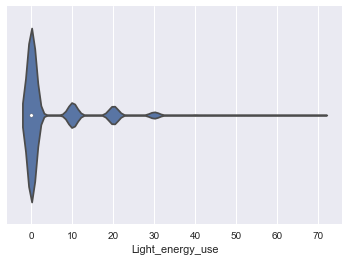

In [8]:
sns.violinplot(df.Light_energy_use)

In [9]:
df = df.drop(['Light_energy_use', 'rv1','rv2'],axis=1)

For the Light_energy_use column we had **more than 75% of the data as 0**. So, I preferred to drop this column. 

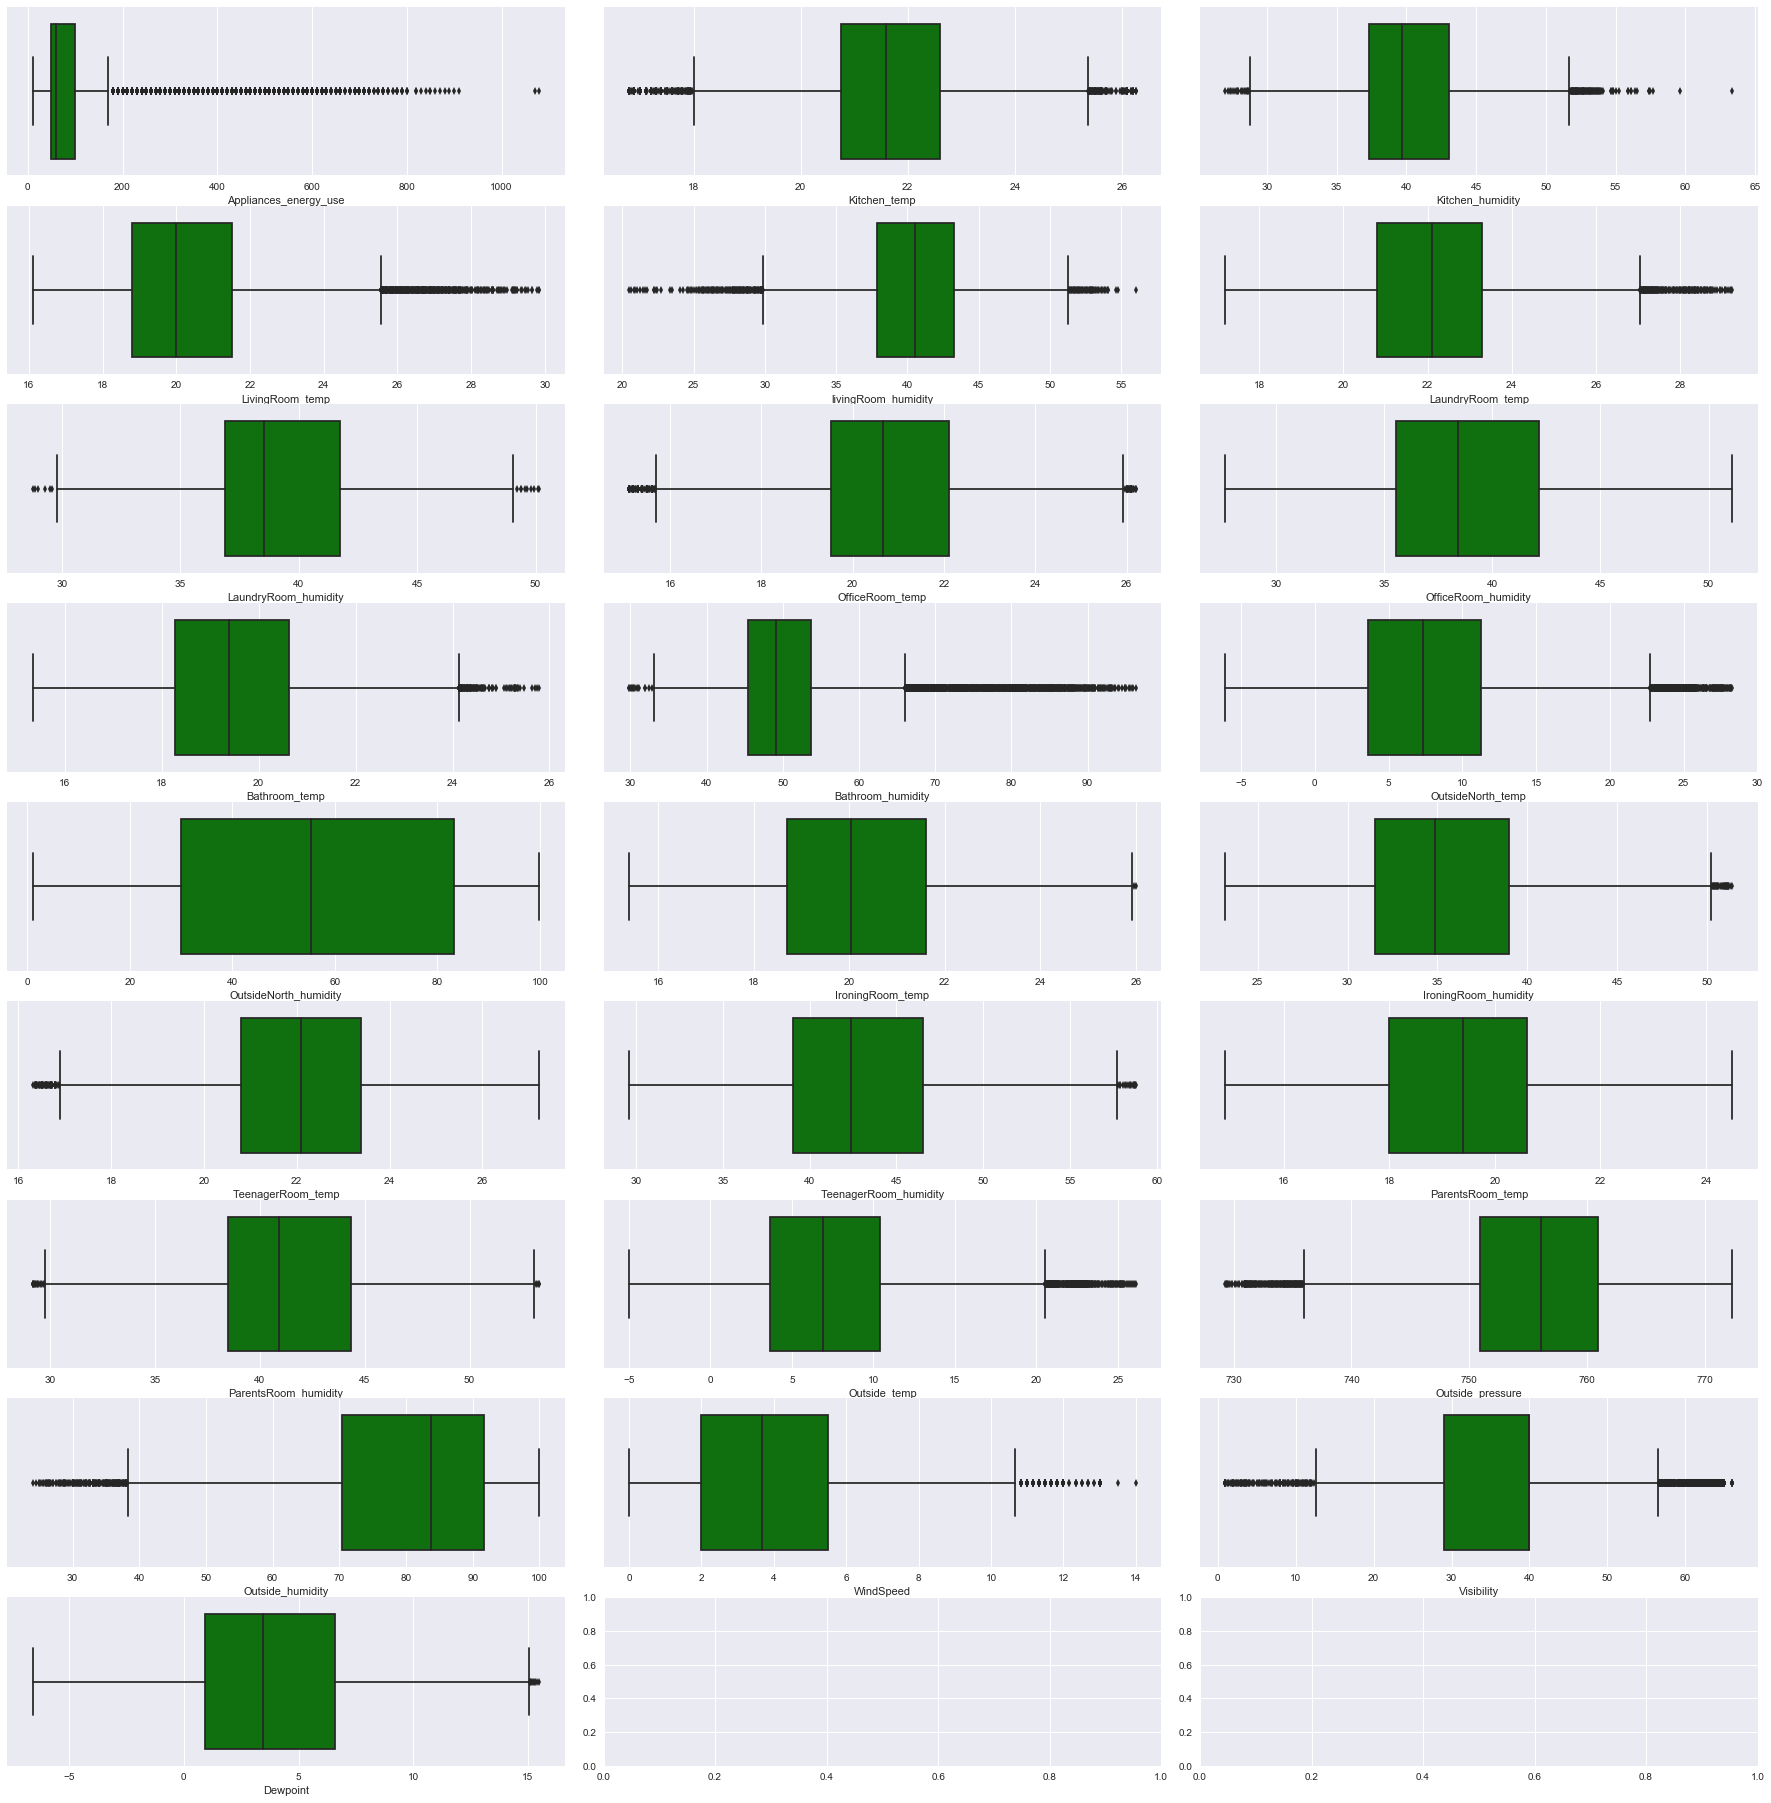

In [10]:
xposition =0
yposition =0
fig , ax1 = plt.subplots(nrows=9, ncols=3,figsize=(25,25) )
plt.tight_layout()
for col in df.columns:
    sns.boxplot(col, data=df, ax = ax1[xposition,yposition], color='g')
    if(yposition==2):
        yposition=0
        xposition = xposition + 1 
    else:
        yposition = yposition +1
    


In [11]:
def outliers_mad(col):
    #Median absolute deviation method for outlier detection
    outliers=[]
    threshold = 3.5
    col_median = np.median(col)
    mad = np.median([np.abs(val - col_median) for val in col])
    for val in col:
        modified_z_scores =(0.06745 *(val - col_median))/mad 
        if((modified_z_scores > threshold) | (modified_z_scores < -threshold)):
            outliers.append(val)
    return outliers
         

In [12]:
for column in df:
    outlier = outliers_mad(df[column]) 
    if(len(outlier)==0):
        print(column , "==> Has no outlier")

Appliances_energy_use ==> Has no outlier
Kitchen_temp ==> Has no outlier
Kitchen_humidity ==> Has no outlier
LivingRoom_temp ==> Has no outlier
livingRoom_humidity ==> Has no outlier
LaundryRoom_temp ==> Has no outlier
LaundryRoom_humidity ==> Has no outlier
OfficeRoom_temp ==> Has no outlier
OfficeRoom_humidity ==> Has no outlier
Bathroom_temp ==> Has no outlier
Bathroom_humidity ==> Has no outlier
OutsideNorth_temp ==> Has no outlier
OutsideNorth_humidity ==> Has no outlier
IroningRoom_temp ==> Has no outlier
IroningRoom_humidity ==> Has no outlier
TeenagerRoom_temp ==> Has no outlier
TeenagerRoom_humidity ==> Has no outlier
ParentsRoom_temp ==> Has no outlier
ParentsRoom_humidity ==> Has no outlier
Outside_temp ==> Has no outlier
Outside_pressure ==> Has no outlier
Outside_humidity ==> Has no outlier
WindSpeed ==> Has no outlier
Visibility ==> Has no outlier
Dewpoint ==> Has no outlier


Outliers can be found using various methods. I use **Median absolute deviation method** and **box and whisker** to find out the outliers.

In [13]:
def get_outlier_boundaries(column):
    #boxplot whisker method for outlier detection
    outliers = []
    q75, q25  = np.percentile(column, [75,25])
    iqr = q75 - q25

    lower = q25 - 1.5 * iqr
    upper = q75 + 1.5 * iqr
                 
    return lower, upper
    

In [14]:
lower, upper = get_outlier_boundaries(df.Appliances_energy_use)
len(df[(df.Appliances_energy_use < lower) | (df.Appliances_energy_use > upper)])

2138

In [15]:
lower, upper = get_outlier_boundaries(df.Outside_temp)
temp_outlier = df[(df.Outside_temp < lower) | (df.Outside_temp > upper)]
len(temp_outlier)

436

In [16]:
lower, upper = get_outlier_boundaries(df.WindSpeed)
print(lower, upper)
len(df[(df.WindSpeed < lower) | (df.WindSpeed > upper)])

-3.25 10.75


214

In [17]:
df=df.drop(df[(df.WindSpeed < lower) | (df.WindSpeed > upper)].index)

In [18]:
lower, upper = get_outlier_boundaries(df.Dewpoint)
print(lower, upper)
len(df[(df.Dewpoint < lower) | (df.Dewpoint> upper)])

-7.64166666667 15.0916666667


10

In [19]:
df=df.drop(df[(df.Dewpoint < lower) | (df.Dewpoint > upper)].index)

In [20]:
lower, upper = get_outlier_boundaries(df.ParentsRoom_humidity)
print(lower, upper)
len(df[(df.ParentsRoom_humidity < lower) | (df.ParentsRoom_humidity> upper)])

29.815 52.975


28

In [21]:
df=df.drop(df[(df.ParentsRoom_humidity < lower) | (df.ParentsRoom_humidity > upper)].index)

In [22]:
lower, upper = get_outlier_boundaries(df.LaundryRoom_humidity)
print(lower, upper)
len(df[(df.LaundryRoom_humidity< lower) | (df.LaundryRoom_humidity> upper)])

29.721969697 48.7656060606


19

In [23]:
df=df.drop(df[(df.LaundryRoom_humidity < lower) | (df.LaundryRoom_humidity > upper)].index)

In [24]:
len(df[df.Kitchen_humidity > 55])

12

In [25]:
df=df.drop(df[df.Kitchen_humidity > 55].index)

In [26]:
lower, upper = get_outlier_boundaries(df.OfficeRoom_temp)
print(lower, upper)
len(df[(df.OfficeRoom_temp< lower) | (df.OfficeRoom_temp> upper)])

15.6833333333 25.95


186

In [27]:
df=df.drop(df[(df.OfficeRoom_temp< lower) | (df.OfficeRoom_temp> upper)].index)

In [28]:
lower, upper = get_outlier_boundaries(df.IroningRoom_temp)
print(lower, upper)
len(df[(df.IroningRoom_temp< lower) | (df.IroningRoom_temp> upper)])

14.4446428571 25.9389285714


2

In [29]:
df=df.drop(df[(df.IroningRoom_temp< lower) | (df.IroningRoom_temp> upper)].index)

In [30]:
lower, upper = get_outlier_boundaries(df.IroningRoom_humidity)
print(lower, upper)
len(df[(df.IroningRoom_humidity< lower) | (df.IroningRoom_humidity> upper)])

20.125 50.165


41

In [31]:
df=df.drop(df[(df.IroningRoom_humidity< lower) | (df.IroningRoom_humidity> upper)].index)

In [32]:
lower, upper = get_outlier_boundaries(df.TeenagerRoom_temp)
print(lower, upper)
len(df[(df.TeenagerRoom_temp< lower) | (df.TeenagerRoom_temp> upper)])

16.89 27.29


0

In [33]:
lower, upper = get_outlier_boundaries(df.TeenagerRoom_humidity)
print(lower, upper)
len(df[(df.TeenagerRoom_humidity< lower) | (df.TeenagerRoom_humidity> upper)])

28.065 57.225


4

In [34]:
df=df.drop(df[(df.TeenagerRoom_humidity< lower) | (df.TeenagerRoom_humidity> upper)].index)

In [35]:
df.shape

(19219, 25)

In [36]:
df.to_csv('energydata_clean.csv',index=False)

# Some data facts

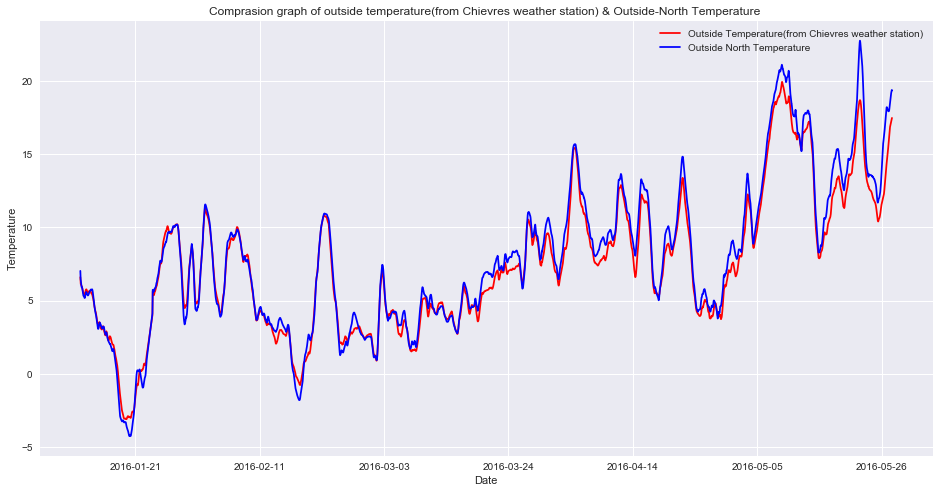

In [37]:
# check the graph of outside Temprature
fig , ax1 = plt.subplots(figsize=(16,8))
plt.plot(df['Outside_temp'].rolling(window='D').mean(), color='r', label= 'Outside Temperature(from Chievres weather station)')
plt.plot(df['OutsideNorth_temp'].rolling(window='D').mean(), color='b', label= 'Outside North Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc='upper right')
plt.title('Comprasion graph of outside temperature(from Chievres weather station) & Outside-North Temperature ')


Graph for outside temperature (from Chievres weather station) & Outside-North Temperature is almost similar. **These two attributes can be treated as co-linear. ** It could be a problem for our model as multicollinearity increases the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. We will explore this point while modeling.

Let's check linear relationship of these two attributes.

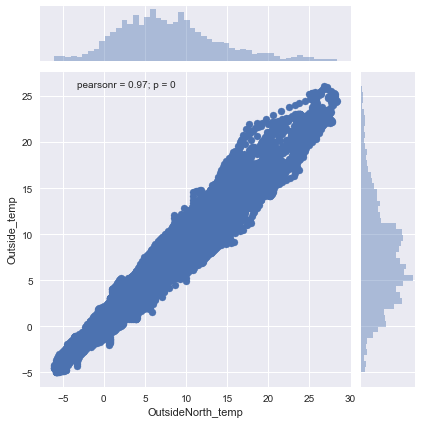

In [38]:
sns.jointplot('OutsideNorth_temp','Outside_temp', data=df)

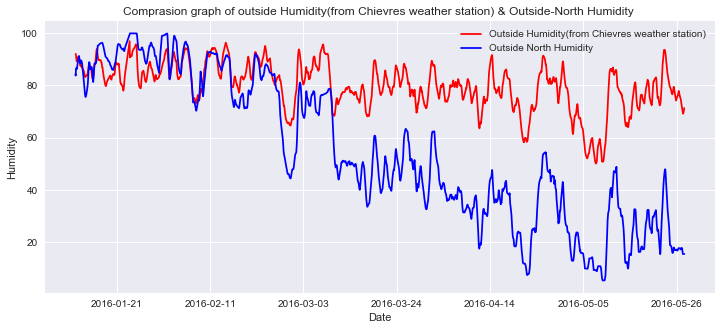

In [55]:
# check the graph of outside Humidity
fig , ax1 = plt.subplots(figsize=(12,5))
plt.plot(df['Outside_humidity'].rolling(window='D').mean(), color='r', 
         label= 'Outside Humidity(from Chievres weather station)')
plt.plot(df['OutsideNorth_humidity'].rolling(window='D').mean(), color='b', label= 'Outside North Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend(loc='upper right')
plt.title('Comprasion graph of outside Humidity(from Chievres weather station) & Outside-North Humidity ')

Outside Humidity (from Chievres weather station) and Building Northside Humidity was almost same but from mid of the march Building northside humidity became significantly lower than the outside humidity. Probably AC could be the reason because days are hotter after mid-March, which will be visible in temperature graph as well.

In [40]:
#Analyzed the data monthwise
data_jan = df['2016-01']
data_feb = df['2016-02']
data_mar= df['2016-03']
data_apr = df['2016-04']
data_may = df['2016-05']

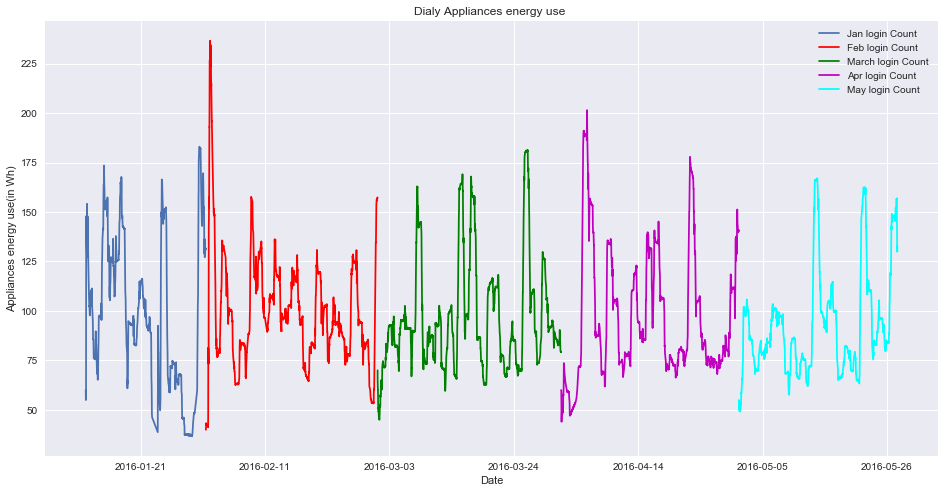

In [41]:
fig , ax1 = plt.subplots(figsize=(16,8))
plt.plot(data_jan['Appliances_energy_use'].rolling(window='D').mean(),label= 'Jan login Count')
plt.plot(data_feb['Appliances_energy_use'].rolling(window='D').mean(), color='r', label= 'Feb login Count')
plt.plot(data_mar['Appliances_energy_use'].rolling(window='D').mean(), color='g', label= 'March login Count')
plt.plot(data_apr['Appliances_energy_use'].rolling(window='D').mean(), color='m', label= 'Apr login Count')
plt.plot(data_may['Appliances_energy_use'].rolling(window='D').mean(), color='aqua', label= 'May login Count')
plt.xlabel('Date')
plt.ylabel('Appliances energy use(in Wh)')
plt.legend(loc='upper right')
plt.title('Dialy Appliances energy use ')

* Some days have higher Energy consumption where some days has less. This pattern needs to be investigated further
* April month has the highest energy consumption. Average usage has reached up to 200 Wh in a given day.


In [42]:

# Evaluate hour and wekdays
df_data= df.reset_index()
df_data['hour'] = df_data['date'].dt.hour
df_data['dow'] = df_data['date'].dt.weekday_name
df_data['month'] = df_data['date'].dt.month


Each month has different pattern of energy usage

(0.0, 1.0, 0.0, 1.0)

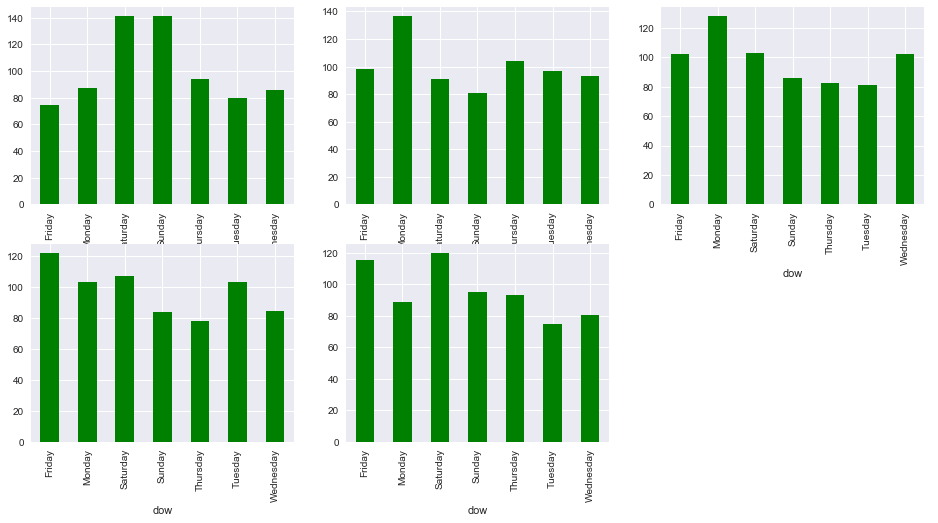

In [43]:
fig , ax1 = plt.subplots( nrows=2, ncols=3, figsize=(16,8))
df_data[df_data.month==1].groupby('dow')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[0,0])
df_data[df_data.month==1].groupby('dow')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[0,0], label='Jan')
df_data[df_data.month==2].groupby('dow')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[0,1], label='Feb')
df_data[df_data.month==3].groupby('dow')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[0,2], label='Jan')
df_data[df_data.month==4].groupby('dow')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[1,0], label='Jan')
df_data[df_data.month==5].groupby('dow')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[1,1], label='Jan')
ax1[1,2].axis('off')


This is interesting to note here that energy consumption is **not dependent on week days**. Each month has different days as peak and lowest usage of energy. Jan has maximum energy usage on Saturday and Sunday and lowest on Friday, Feb has highest on Monday and lowest on Saturday. Likewise, other months has different days as maximum and minimum energy consumption.

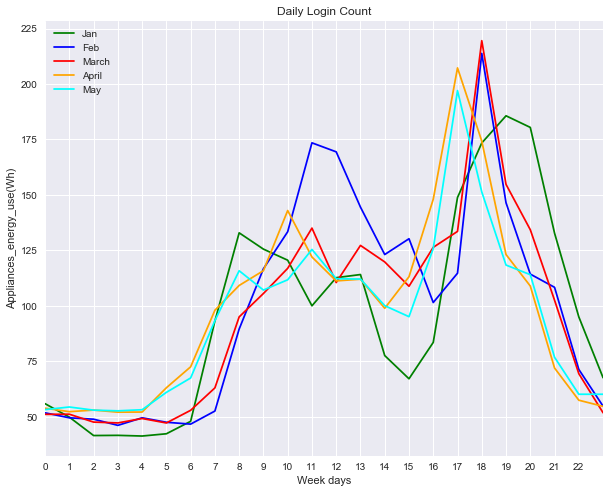

In [44]:
fig , ax1 = plt.subplots( figsize=(10,8))
df_data[df_data.month==1].groupby('hour')['Appliances_energy_use'].mean().plot( color='g', label='Jan')
df_data[df_data.month==2].groupby('hour')['Appliances_energy_use'].mean().plot( color='b', label='Feb')
df_data[df_data.month==3].groupby('hour')['Appliances_energy_use'].mean().plot( color='r', label='March')
df_data[df_data.month==4].groupby('hour')['Appliances_energy_use'].mean().plot( color='orange', label='April')
df_data[df_data.month==5].groupby('hour')['Appliances_energy_use'].mean().plot( color='aqua', label='May')
plt.xlabel('Week days')
plt.ylabel('Appliances_energy_use(Wh)')
plt.xticks(range(0,23))
plt.legend(loc='upper left')
plt.title('Daily Login Count')

(0.0, 1.0, 0.0, 1.0)

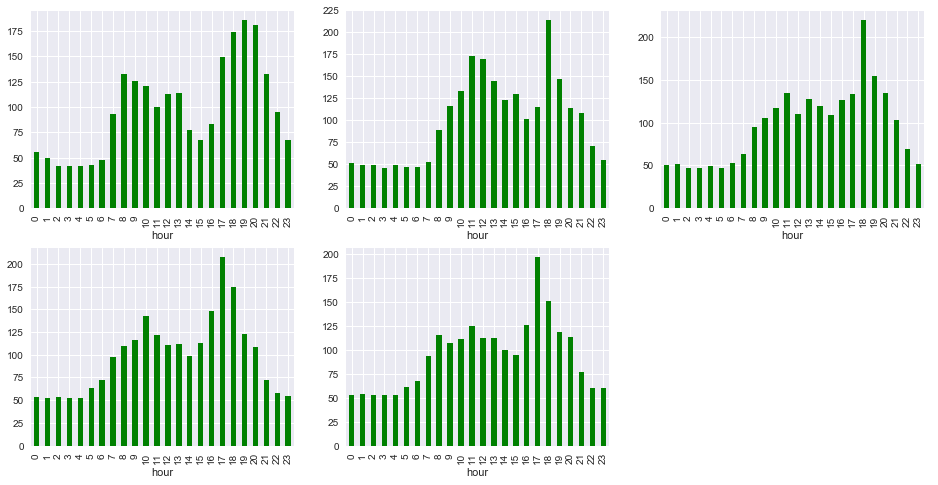

In [45]:
fig , ax1 = plt.subplots( nrows=2, ncols=3, figsize=(16,8))
df_data[df_data.month==1].groupby('hour')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[0,0], label='Jan')
df_data[df_data.month==2].groupby('hour')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[0,1], label='Jan')
df_data[df_data.month==3].groupby('hour')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[0,2], label='Jan')
df_data[df_data.month==4].groupby('hour')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[1,0], label='Jan')
df_data[df_data.month==5].groupby('hour')['Appliances_energy_use'].mean().plot(kind='bar', color='g', ax=ax1[1,1], label='Jan')
ax1[1,2].axis('off')

* Hourly Appliances Usage is almost similar for all the months Except Feb has significantly high usage during 10 am – 2 pm and Jan has low usage during 2-4 pm. 
* Lowest energy usage is between 10 pm- 6 am every day.
* Peak energy usage is between 5 - 7 pm every day.


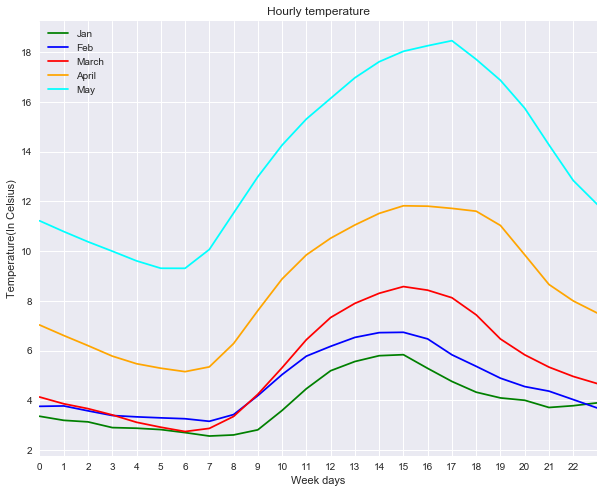

In [46]:
fig , ax1 = plt.subplots( figsize=(10,8))
df_data[df_data.month==1].groupby('hour')['Outside_temp'].mean().plot( color='g', label='Jan')
df_data[df_data.month==2].groupby('hour')['Outside_temp'].mean().plot( color='b', label='Feb')
df_data[df_data.month==3].groupby('hour')['Outside_temp'].mean().plot( color='r', label='March')
df_data[df_data.month==4].groupby('hour')['Outside_temp'].mean().plot( color='orange', label='April')
df_data[df_data.month==5].groupby('hour')['Outside_temp'].mean().plot( color='aqua', label='May')
plt.xlabel('Week days')
plt.ylabel('Temperature(In Celsius)')
plt.xticks(range(0,23))
plt.legend(loc='upper left')
plt.title('Hourly temperature')

* Temperature pattern is similar for all the months. it starts increase from 7 am reach to peak between 12-5 pm and start decreasing after 5 pm. Temperature is lowest between 9 pm – 6 pm.
* Jan is having lowest temperature and May is hottest.


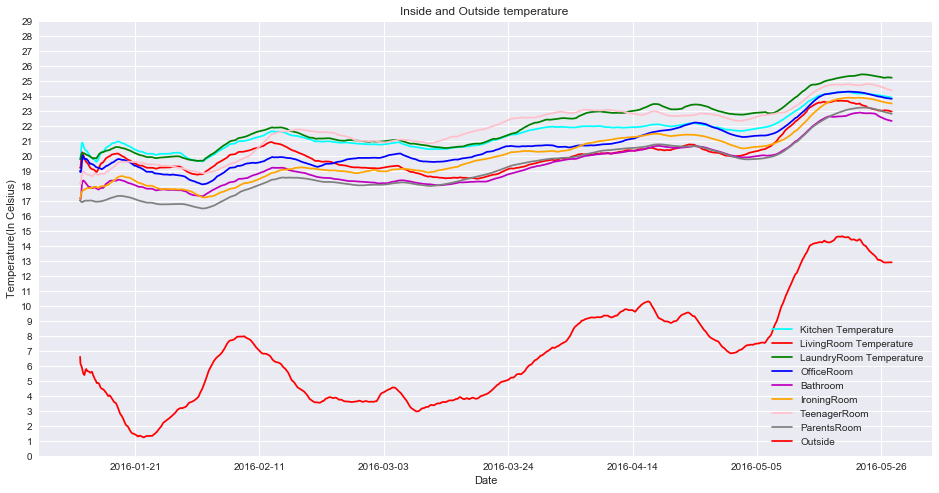

In [47]:
fig , ax1 = plt.subplots(figsize=(16,8))
plt.plot(df['Kitchen_temp'].rolling(window='14D').mean(),color='aqua',label= 'Kitchen Temperature')
plt.plot(df['LivingRoom_temp'].rolling(window='14D').mean(), color='r', label= 'LivingRoom Temperature')
plt.plot(df['LaundryRoom_temp'].rolling(window='14D').mean(), color='g', label= 'LaundryRoom Temperature')
plt.plot(df['OfficeRoom_temp'].rolling(window='14D').mean(), color='b',label= 'OfficeRoom')
plt.plot(df['Bathroom_temp'].rolling(window='14D').mean(), color='m', label= 'Bathroom')
plt.plot(df['IroningRoom_temp'].rolling(window='14D').mean(), color='orange', label= 'IroningRoom')
plt.plot(df['TeenagerRoom_temp'].rolling(window='14D').mean(), color='pink', label= 'TeenagerRoom')
plt.plot(df['ParentsRoom_temp'].rolling(window='14D').mean(), color='gray', label= 'ParentsRoom')
plt.plot(df['Outside_temp'].rolling(window='14D').mean(), color='red', label= 'Outside')
plt.xlabel('Date')
plt.yticks(range(0,30))
plt.ylabel('Temperature(In Celsius)')
plt.legend(loc='lower right')
#plt.text(horizontalalignment='center',verticalalignment='center',s='Inside Temp')
plt.title('Inside and Outside temperature ')

* Inside temperature is always maintained between 17-25 Celsius. 
* Each room of the home don not have same temperature.
* Parent's room is always coolest where as laundry room is the always hottest in house.


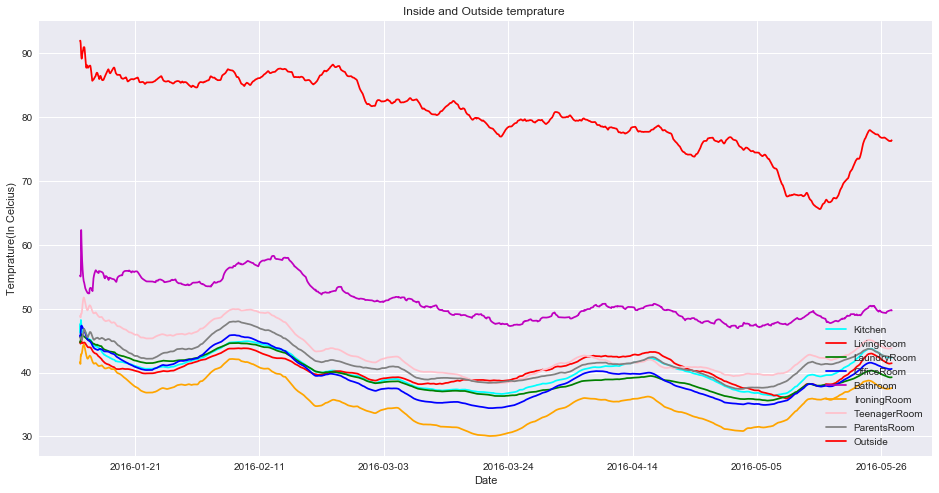

In [48]:
fig , ax1 = plt.subplots(figsize=(16,8))
plt.plot(df['Kitchen_humidity'].rolling(window='14D').mean(),color='aqua',label= 'Kitchen')
plt.plot(df['livingRoom_humidity'].rolling(window='14D').mean(), color='r', label= 'LivingRoom')
plt.plot(df['LaundryRoom_humidity'].rolling(window='14D').mean(), color='g', label= 'LaundryRoom')
plt.plot(df['OfficeRoom_humidity'].rolling(window='14D').mean(), color='b',label= 'OfficeRoom')
plt.plot(df['Bathroom_humidity'].rolling(window='14D').mean(), color='m', label= 'Bathroom')
plt.plot(df['IroningRoom_humidity'].rolling(window='14D').mean(), color='orange', label= 'IroningRoom')
plt.plot(df['TeenagerRoom_humidity'].rolling(window='14D').mean(), color='pink', label= 'TeenagerRoom')
plt.plot(df['ParentsRoom_humidity'].rolling(window='14D').mean(), color='gray', label= 'ParentsRoom')
plt.plot(df['Outside_humidity'].rolling(window='14D').mean(), color='red', label= 'Outside')
plt.xlabel('Date')
#plt.yticks(range(0,30))
plt.ylabel('Temprature(In Celcius)')
plt.legend(loc='lower right')
#plt.text(horizontalalignment='center',verticalalignment='center',s='Inside Temp')
plt.title('Inside and Outside temprature ')

* Inside Humidity is always maintained. This is because temperature is maintained inside the house.
* Each room has different humidity level.
* bathroom is the most humid where as Ironing room is most dry area which is logical.


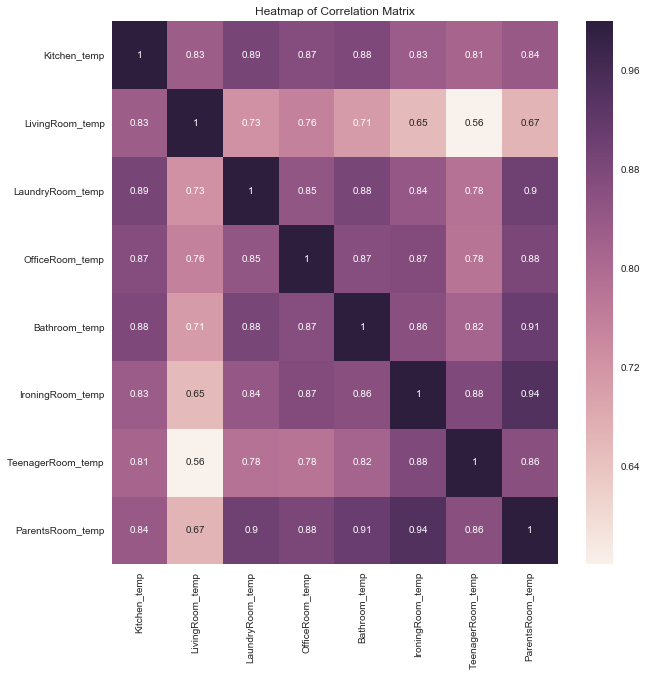

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
df_homeTemp= df[['Kitchen_temp','LivingRoom_temp','LaundryRoom_temp','OfficeRoom_temp','Bathroom_temp',
                'IroningRoom_temp','TeenagerRoom_temp','ParentsRoom_temp']]
cor = df_homeTemp.corr()
sns.heatmap(cor, annot=True)
sns.plt.title('Heatmap of Correlation Matrix')

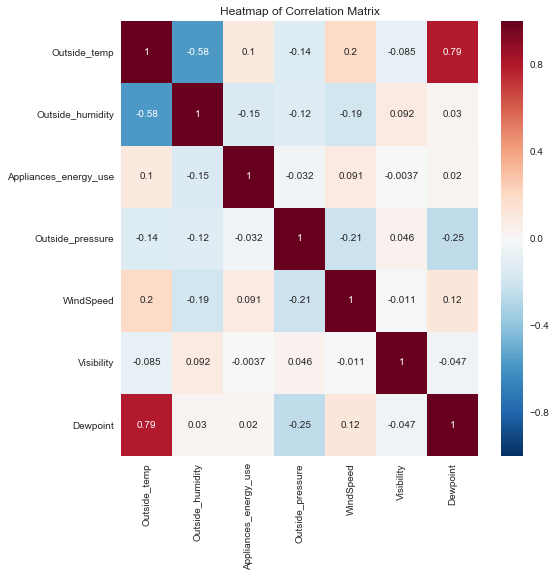

In [50]:
fig, ax = plt.subplots(figsize=(8,8))
df_homeTemp= df[['Outside_temp','Outside_humidity','Appliances_energy_use','Outside_pressure','WindSpeed',
                   'Visibility','Dewpoint' ]]
cor = df_homeTemp.corr()
sns.heatmap(cor, annot=True)
sns.plt.title('Heatmap of Correlation Matrix')

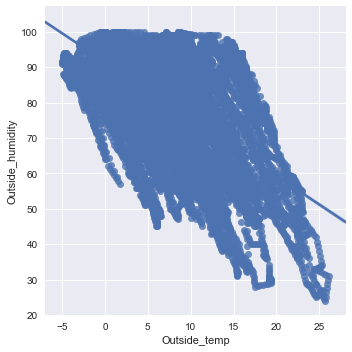

In [51]:
sns.lmplot('Outside_temp','Outside_humidity', data=df )

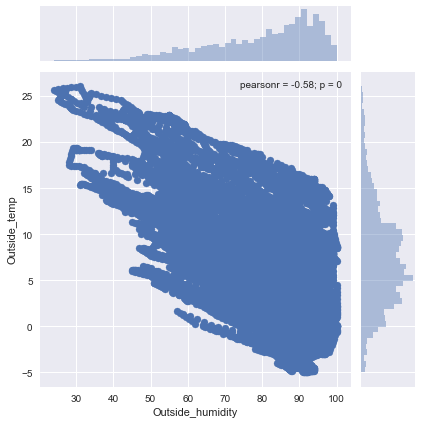

In [52]:
sns.jointplot('Outside_humidity','Outside_temp', data=df )

Outside humidity and outside temperature has some **negative correlation**.

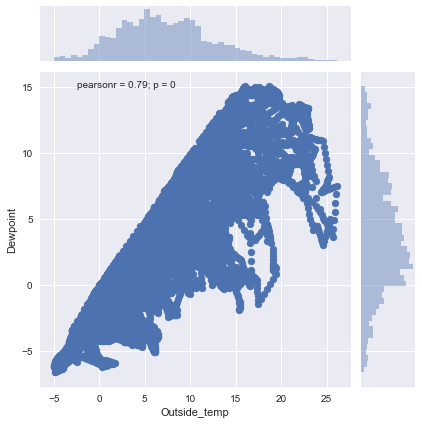

In [53]:
sns.jointplot('Outside_temp','Dewpoint', data=df )

Outside temperature and Dewpoint has **positive correlation**.